---
title: Moving Average Models, ACF and PACF
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

Let us first simulate some data from the Gaussian white noise. After that, we will simulate data from the Moving Average models and compare them to the simulated white noise data. 

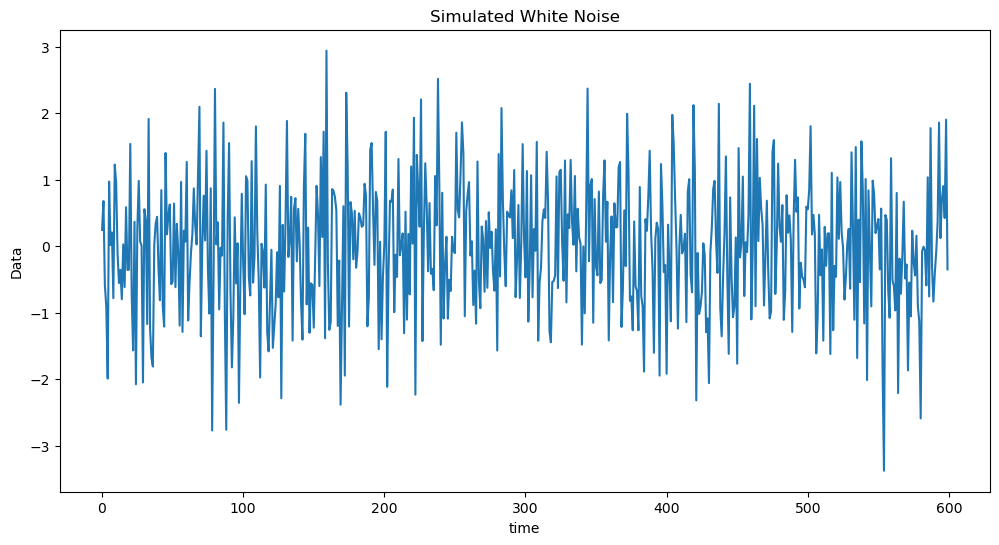

In [2]:
#Simulating from Gaussian white noise:
n = 600
seed = 43
rng = np.random.default_rng(seed)
sig = 1
y_wn = rng.normal(loc = 0, scale = sig, size = n)
plt.figure(figsize = (12, 6))
plt.plot(y_wn)
plt.xlabel('time')
plt.ylabel('Data')
plt.title('Simulated White Noise')
plt.show()


Next we shall simulate observations from the MA(1) model: $y_t = \mu + \epsilon_t + \theta \epsilon_{t-1}$. 

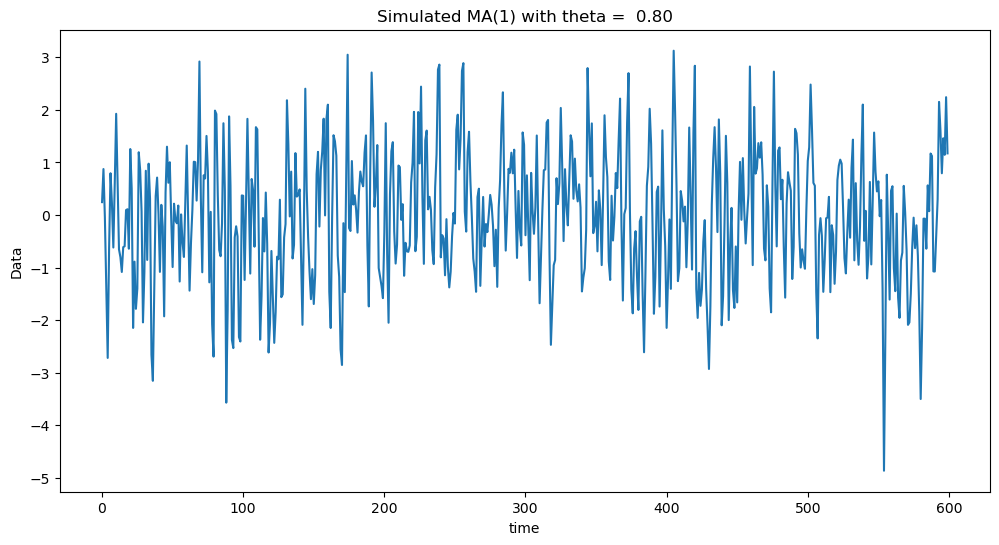

In [3]:
#Simulating MA(1)
y_0 = np.concatenate(([0], y_wn))
theta = 0.8
y_ma = y_0[1:] + theta * y_0[:-1]
plt.figure(figsize = (12, 6))
plt.plot(y_ma)
plt.xlabel('time')
plt.ylabel('Data')
plt.title(f'Simulated MA(1) with theta = {theta: .2f}')
plt.show()


Below we plot the white noise observations, together with the simulated MA(1) observations for $\theta = 0.8$ and $\theta = -0.8$. When $\theta > 0$, the autocorrelation at lag one is positive making the data look smoother (compared to white noise). When $\theta < 0$, the autocorrelation at lag one is negative making the data look more wiggly (compared to white noise).

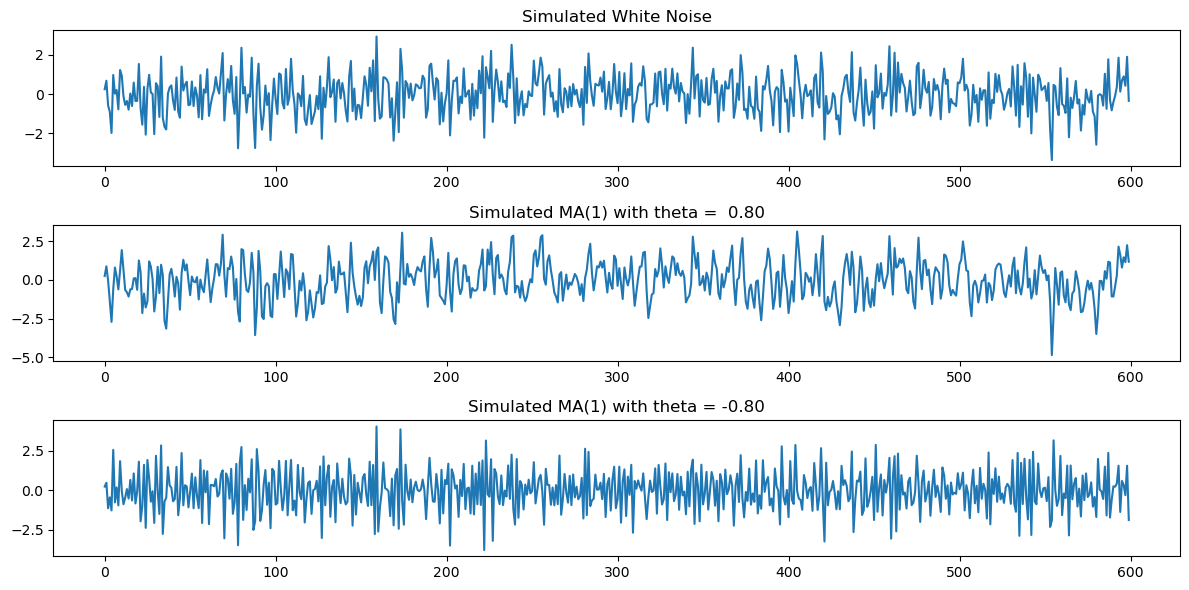

In [4]:
fig, axes = plt.subplots(nrows = 3, ncols = 1, figsize = (12, 6))


axes[0].plot(y_wn)
axes[0].set_title('Simulated White Noise')

theta = 0.8
y_ma_1 = y_0[1:] + theta * y_0[:-1]
axes[1].plot(y_ma_1)
axes[1].set_title(f'Simulated MA(1) with theta = {theta: .2f}')

theta = -0.8
y_ma_2 = y_0[1:] + theta * y_0[:-1] #y_ma_2 is simulated data from MA(1) with negative theta
axes[2].plot(y_ma_2)
axes[2].set_title(f'Simulated MA(1) with theta = {theta: .2f}')

plt.tight_layout()
plt.show()

## Sample ACF

We can distinguish between these datasets by computing the sample ACF which is defined as follows. Given a time series dataset $y_1, \dots, y_n$ and a **lag** h, define
\begin{equation}
   r_h := \frac{\sum_{t=1}^{n-h} (y_t - \bar{y})(y_{t+h} - \bar{y})}{\sum_{t=1}^n (y_t - \bar{y})^2}
\end{equation}
for $h = 0, 1, 2, \dots$. Here $\bar{y}$ is simply the mean of $z_1, \dots, z_n$. The acf plot graphs $h$ on the x-axis and $r_h$ on the y-axis. The quantity $r_h$ is known as the **sample autocorrelation** of the data at lag $h$ (acf stands for "Autocorrelation Function").

Below we compute the sample ACF. 

1.0


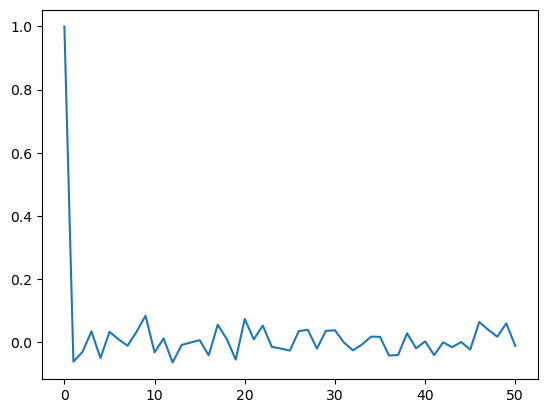

In [5]:
def sample_acf(y, h_max):
    n = len(y)
    y_mean = sum(y) / n
    denominator = sum((y_t - y_mean) ** 2 for y_t in y)
    autocorr = []

    for h in range(h_max + 1):
        numerator = sum((y[t] - y_mean) * (y[t + h] - y_mean) for t in range(n - h))
        r_h = numerator / denominator
        autocorr.append(r_h)

    return autocorr

h_max = 50 
sample_acf_vals = sample_acf(y_wn, h_max)
print(sample_acf_vals[0]) #the sample_acf at lag = 0 always equals 1
plt.plot(range(0, h_max + 1), sample_acf_vals)
plt.show()

Visually, one gets nicer plots for the sample ACF by using the stem plot. 

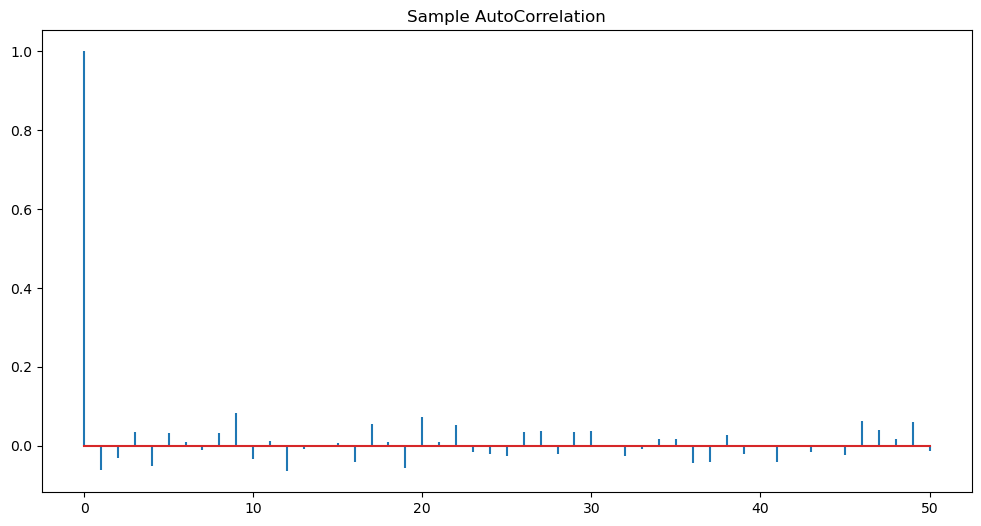

In [6]:
h_max = 50 
sample_acf_vals = sample_acf(y_wn, h_max)
plt.figure(figsize = (12, 6))
markerline, stemline, baseline = plt.stem(range(0, h_max + 1), sample_acf_vals)
markerline.set_marker("None")
plt.title('Sample AutoCorrelation')
plt.show()

Note that the sample ACF always takes the value 1 at $h = 0$ so the first spike is not giving us any information. We only look at the sample ACF for lages $h \geq 1$. From the above ACF plot, it appears that sample ACF values at all $h \geq 1$ are negligible. 

Next we plot the sample ACF for MA(1) for positive as well as negative $\theta$. 

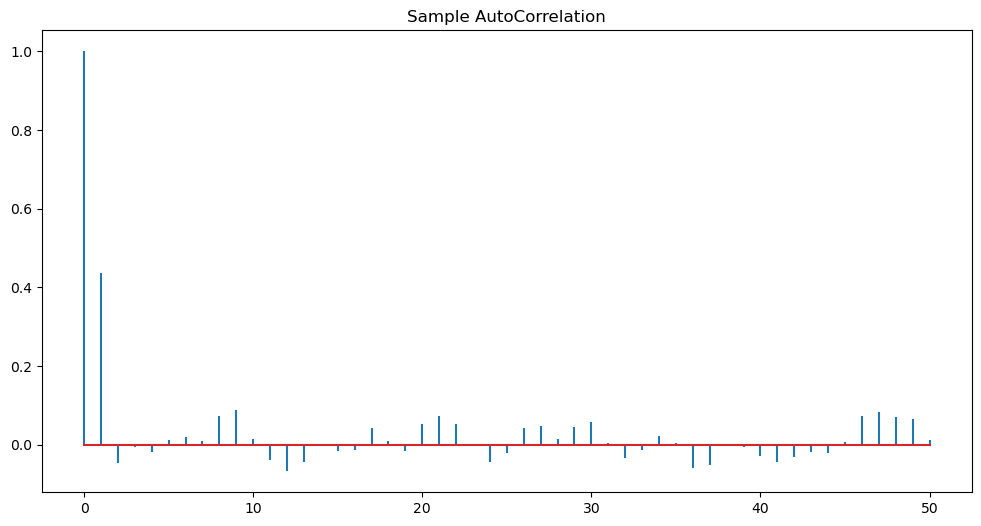

In [7]:
h_max = 50 
sample_acf_vals = sample_acf(y_ma_1, h_max)
plt.figure(figsize = (12, 6))
markerline, stemline, baseline = plt.stem(range(0, h_max + 1), sample_acf_vals)
markerline.set_marker("None")
plt.title('Sample AutoCorrelation')
plt.show()

Observe the peak at lag one above. This is indicative of the MA(1) model. 

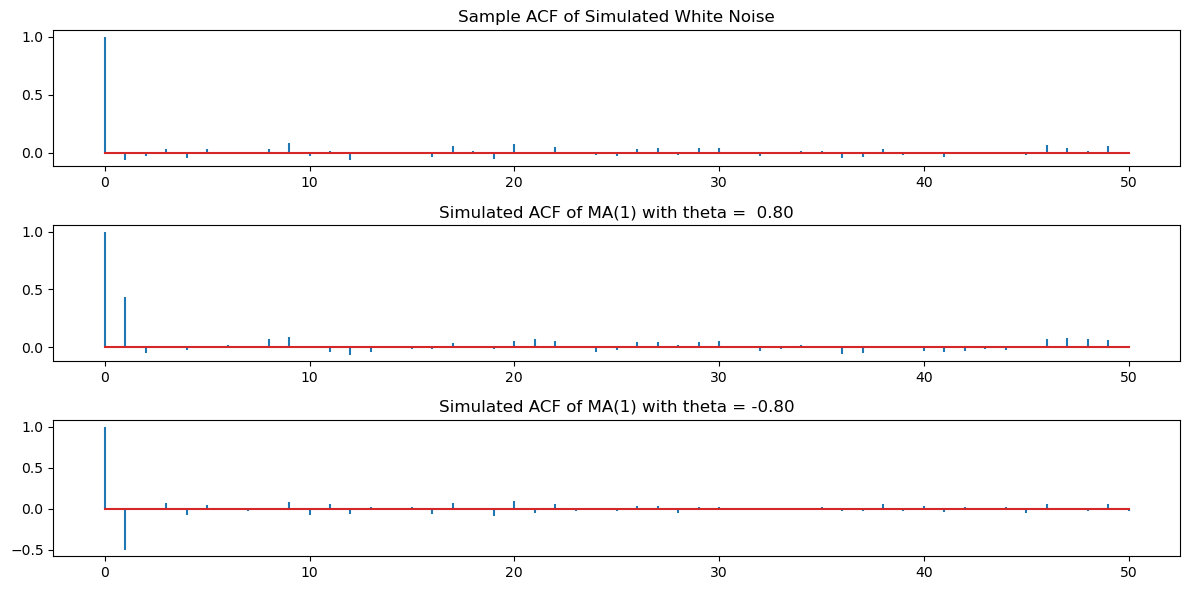

In [8]:
fig, axes = plt.subplots(nrows = 3, ncols = 1, figsize = (12, 6))

sample_acf_vals_wn = sample_acf(y_wn, h_max)
markerline, stemline, baseline = axes[0].stem(range(0, h_max + 1), sample_acf_vals_wn)
markerline.set_marker("None")
axes[0].set_title('Sample ACF of Simulated White Noise')

sample_acf_vals_ma_1 = sample_acf(y_ma_1, h_max)
markerline, stemline, baseline = axes[1].stem(range(0, h_max + 1), sample_acf_vals_ma_1)
markerline.set_marker("None")
theta = 0.8
axes[1].set_title(f'Simulated ACF of MA(1) with theta = {theta: .2f}')

sample_acf_vals_ma_2 = sample_acf(y_ma_2, h_max)
markerline, stemline, baseline = axes[2].stem(range(0, h_max + 1), sample_acf_vals_ma_2)
markerline.set_marker("None")
theta = -0.8
axes[2].set_title(f'Simulated ACF of MA(1) with theta = {theta: .2f}')

plt.tight_layout()
plt.show()

Clearly, there are spikes at lag one for the second and third datasets. The remaining ACF values are negligible. 

There is an inbuilt function in statsmodels for plotting the sample_acf. Its use is demonstrated below. It gives identical answers to our computation. 

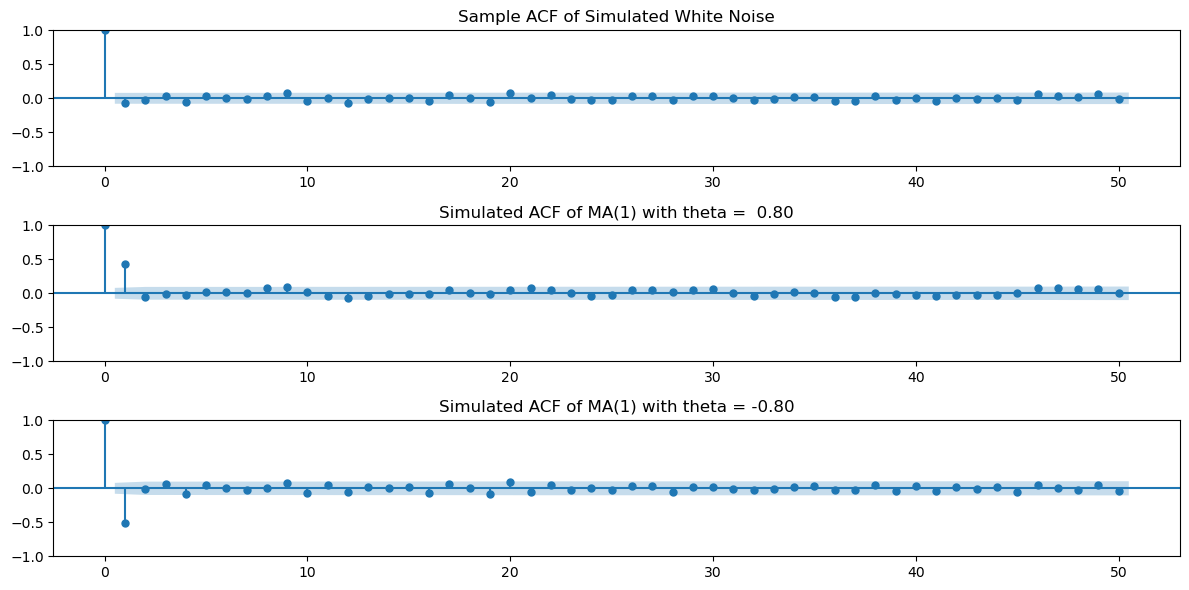

In [9]:
from statsmodels.graphics.tsaplots import plot_acf
fig, axes = plt.subplots(nrows = 3, ncols = 1, figsize = (12, 6))

sample_acf_vals_wn = sample_acf(y_wn, h_max)
plot_acf(y_wn, lags = h_max, ax = axes[0])
axes[0].set_title('Sample ACF of Simulated White Noise')

sample_acf_vals_ma_1 = sample_acf(y_ma_1, h_max)
plot_acf(y_ma_1, lags = h_max, ax = axes[1])
theta = 0.8
axes[1].set_title(f'Simulated ACF of MA(1) with theta = {theta: .2f}')

sample_acf_vals_ma_2 = sample_acf(y_ma_2, h_max)
plot_acf(y_ma_2, lags = h_max, ax = axes[2])
theta = -0.8
axes[2].set_title(f'Simulated ACF of MA(1) with theta = {theta: .2f}')

plt.tight_layout()
plt.show()

To see that the inbuilt function gives answers identical to our calculation, we can do the following. 

In [10]:
from statsmodels.tsa.stattools import acf

acf_values_wn = acf(y_wn, nlags=h_max)
print(np.column_stack([sample_acf_vals_wn, acf_values_wn]))

[[ 1.00000000e+00  1.00000000e+00]
 [-6.18986853e-02 -6.18986853e-02]
 [-3.16190776e-02 -3.16190776e-02]
 [ 3.37684035e-02  3.37684035e-02]
 [-5.08194511e-02 -5.08194511e-02]
 [ 3.25331941e-02  3.25331941e-02]
 [ 8.74858962e-03  8.74858962e-03]
 [-1.16498128e-02 -1.16498128e-02]
 [ 3.26472220e-02  3.26472220e-02]
 [ 8.33178480e-02  8.33178480e-02]
 [-3.27430872e-02 -3.27430872e-02]
 [ 1.14743957e-02  1.14743957e-02]
 [-6.46748355e-02 -6.46748355e-02]
 [-9.26355222e-03 -9.26355222e-03]
 [-1.48030902e-03 -1.48030902e-03]
 [ 5.98188096e-03  5.98188096e-03]
 [-4.20248527e-02 -4.20248527e-02]
 [ 5.47736551e-02  5.47736551e-02]
 [ 9.57612253e-03  9.57612253e-03]
 [-5.55307936e-02 -5.55307936e-02]
 [ 7.32655261e-02  7.32655261e-02]
 [ 8.66336997e-03  8.66336997e-03]
 [ 5.21590566e-02  5.21590566e-02]
 [-1.51121264e-02 -1.51121264e-02]
 [-2.06604710e-02 -2.06604710e-02]
 [-2.69178655e-02 -2.69178655e-02]
 [ 3.49261541e-02  3.49261541e-02]
 [ 3.86381603e-02  3.86381603e-02]
 [-2.07370593e-02 -2

Given the data, we can fit the MA(1) using an inbuilt function. This inbuilt function more generally fits ARIMA models. $\text{order} = (0, 0, 1)$ in the code below refers to the MA(1) model. More generally, $\text{order} = (p, d, q)$ refers to the ARMA(p, q) model after d times differencing (we will explain this in detail later).

In [11]:
from statsmodels.tsa.arima.model import ARIMA
mamod = ARIMA(y_ma_1, order = (0, 0, 1)).fit()
print(mamod.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  600
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -843.763
Date:                Wed, 09 Apr 2025   AIC                           1693.526
Time:                        15:59:24   BIC                           1706.717
Sample:                             0   HQIC                          1698.661
                                - 600                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0272      0.073     -0.371      0.711      -0.171       0.117
ma.L1          0.8212      0.022     36.511      0.000       0.777       0.865
sigma2         0.9732      0.056     17.274      0.0

The estimate of $\theta$ is 0.8212 (which is close to the actual value of 0.8). The estimate of $\mu$ is $-0.0272$ (which is close to the actual value of 0), and the estimate of $\sigma$ is $0.9732$ which is also close to the actual value of 1. We shall later how these point estimates (as well as standard errors) are actually calculated. 

MA models can be used for actual time series. To illustrate this, we give two examples of real data. 

## Varve Dataset

This dataset is from the Shumway and Stoffer book. It gives the thickness of the yearly varves collected from one location in Massachusetts for 634 years (beginning 11,834 years ago!). Varves are sedimentary deposits of sand and silt that are deposited by melting glaciers during the spring melting seasons (see Example 2.6 of the Shumway-Stoffer book, 4th edition, for more details).

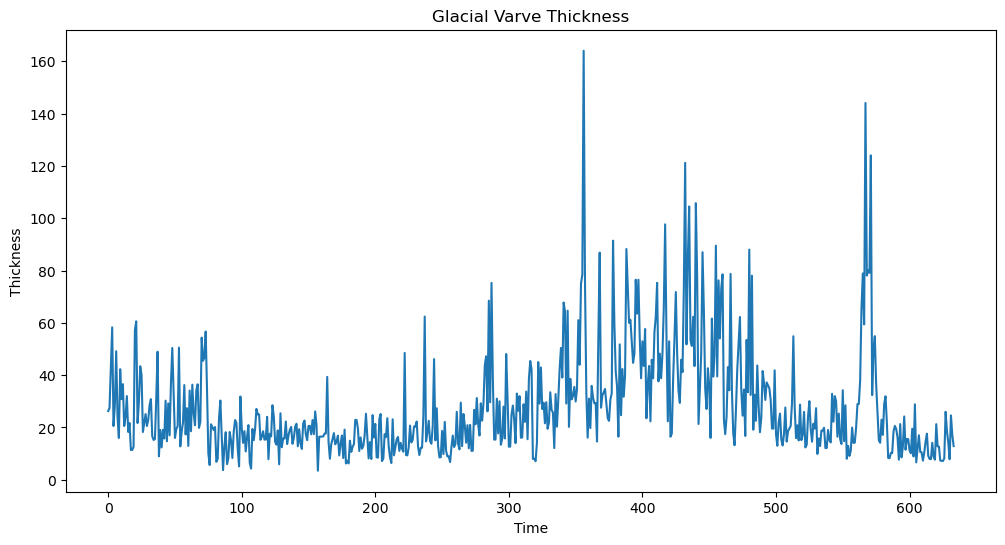

In [12]:
varve_data = pd.read_csv("varve.csv")
yraw = varve_data['x']
plt.figure(figsize = (12, 6))
plt.plot(yraw)
plt.xlabel('Time')
plt.ylabel('Thickness')
plt.title('Glacial Varve Thickness')
plt.show()

We shall work with the logarithms of the raw data. 

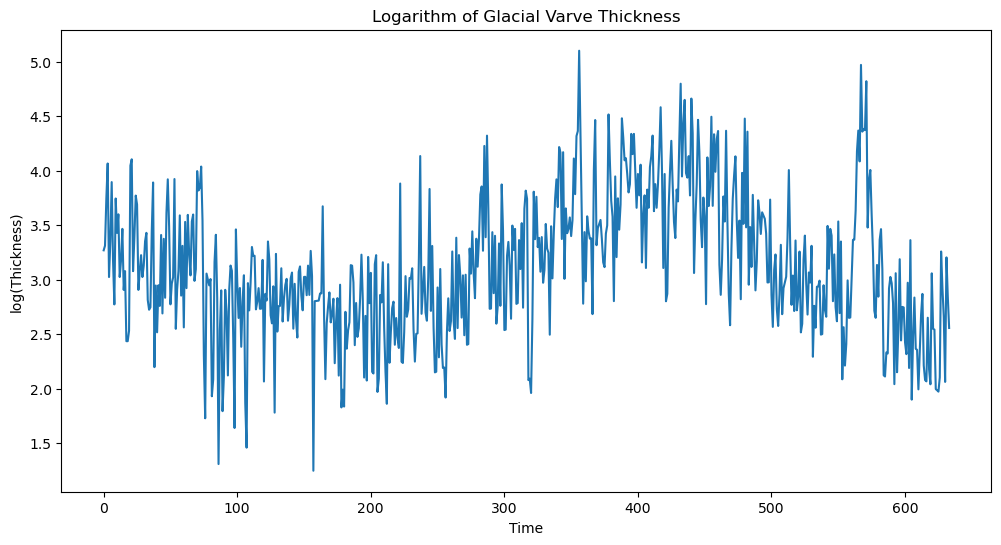

In [13]:
#We shall work with the logarithms: 
ylog = np.log(yraw)
plt.figure(figsize = (12, 6))
plt.plot(ylog)
plt.xlabel('Time')
plt.ylabel('log(Thickness)')
plt.title('Logarithm of Glacial Varve Thickness')
plt.show()

Fitting a stationary model such as MA($q$) is not appropriate for the logarithmed data. This is because the data does not seem to have constant mean. To deal with this, we difference the data as follows. 

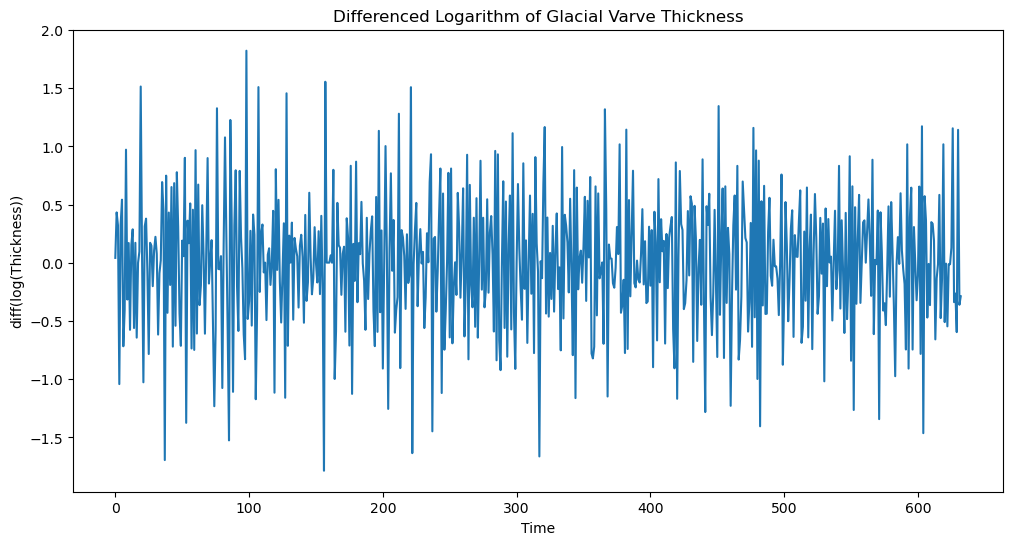

In [14]:
ylogdiff = np.diff(ylog)
plt.figure(figsize = (12, 6))
plt.plot(ylogdiff)
plt.xlabel('Time')
plt.ylabel('diff(log(Thickness))')
plt.title('Differenced Logarithm of Glacial Varve Thickness')
plt.show()

Now we apply the MA($q$) model to this dataset. To figure out the value of $q$, we look at the sample_acf values as follows. 

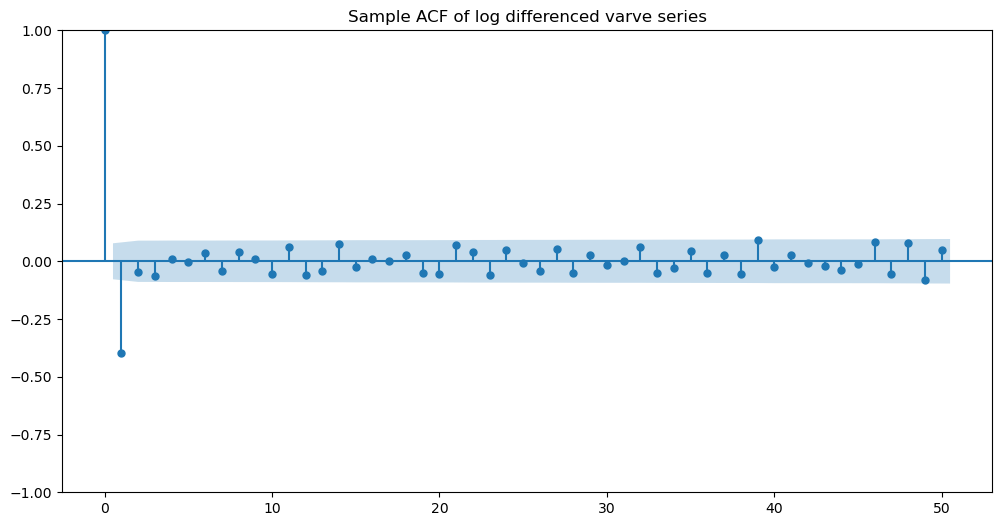

In [15]:
h_max = 50
fig, ax = plt.subplots(figsize=(12, 6)) 
plot_acf(ylogdiff, lags = h_max, ax = ax)
ax.set_title("Sample ACF of log differenced varve series")
plt.show()

It is clear that the sample ACF shows one negative nonnegligible spike at lag one.  The other spikes seem insignificant. So we fit the MA(1) model to this data. 

In [16]:
mamod = ARIMA(ylogdiff, order = (0, 0, 1)).fit()
print(mamod.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  633
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -440.678
Date:                Wed, 09 Apr 2025   AIC                            887.356
Time:                        15:59:47   BIC                            900.707
Sample:                             0   HQIC                           892.541
                                - 633                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0013      0.004     -0.280      0.779      -0.010       0.008
ma.L1         -0.7710      0.023    -33.056      0.000      -0.817      -0.725
sigma2         0.2353      0.012     18.881      0.0

It is interesting that the fitted $\theta$ is negative. 

## GDP Growth Rate Data

Our second dataset is the GDP growth rate data. This can be calculated from the raw GDP data by first taking the logarithms, and then differencing the logarithms. Because, this is a common preprocessing, one can directly obtain the growth rate data from FRED (https://fred.stlouisfed.org/series/A191RP1Q027SBEA).  

  observation_date  A191RP1Q027SBEA
0       1947-04-01              4.7
1       1947-07-01              6.0
2       1947-10-01             17.3
3       1948-01-01              9.6
4       1948-04-01             10.7


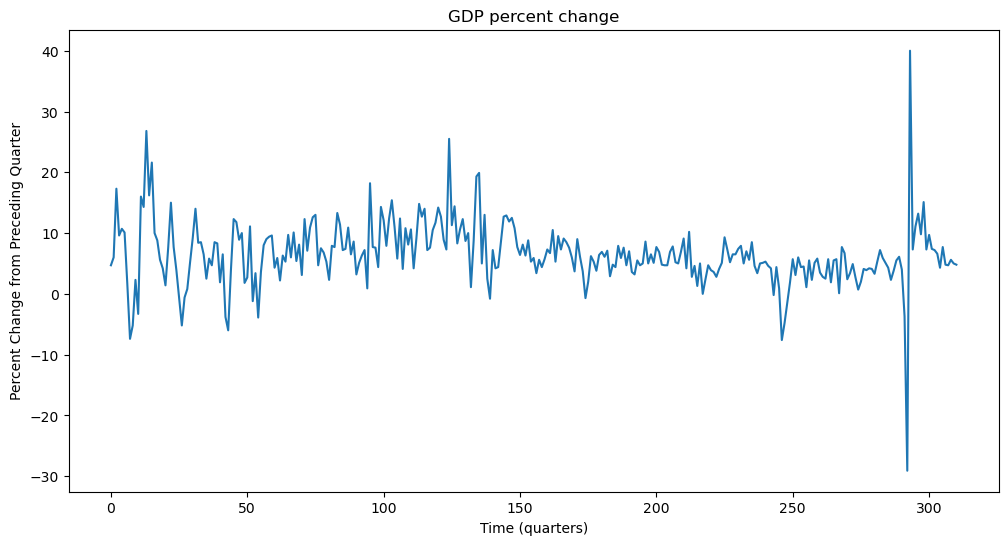

In [18]:
gdp_percentchange = pd.read_csv('A191RP1Q027SBEA_08April2025.csv')
print(gdp_percentchange.head())
y = gdp_percentchange['A191RP1Q027SBEA']
plt.figure(figsize = (12, 6))
plt.plot(y)
plt.xlabel('Time (quarters)')
plt.ylabel('Percent Change from Preceding Quarter')
plt.title('GDP percent change')
plt.show()

Let us compute the sample acf of this dataset. 

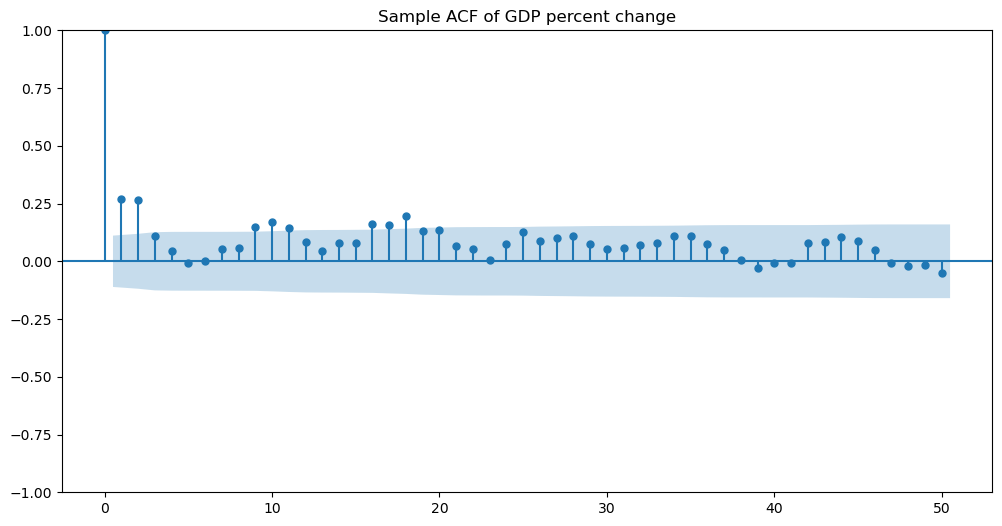

In [19]:
h_max = 50
fig, ax = plt.subplots(figsize=(12, 6)) 
plot_acf(y, lags = h_max, ax = ax)
ax.set_title("Sample ACF of GDP percent change")
plt.show()

There are two spikes sticking out at lags 1 and 2. This indicates that MA(2) is a reasonable model. We fit MA(2) using the following function. Note that the order is now $(0, 0, 2)$ (as opposed to $(0, 0, 1)$ for MA(1)).

In [20]:
mamod = ARIMA(y, order = (0, 0, 2)).fit()
print(mamod.summary())

                               SARIMAX Results                                
Dep. Variable:        A191RP1Q027SBEA   No. Observations:                  311
Model:                 ARIMA(0, 0, 2)   Log Likelihood                -947.207
Date:                Wed, 09 Apr 2025   AIC                           1902.414
Time:                        16:01:59   BIC                           1917.373
Sample:                             0   HQIC                          1908.394
                                - 311                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.5008      0.484     13.422      0.000       5.552       7.450
ma.L1          0.1927      0.032      6.107      0.000       0.131       0.255
ma.L2          0.2267      0.056      4.036      0.0